### 使用最小二乘法拟和曲线
对于数据$(x_i, y_i)(i=1, 2, 3...,m)$

假设拟合出函数$h(x)$

与真实数据y有误差，即残差：$r_i=h(x_i)-y_i$

此时L2范数(残差平方和)最小时，h(x) 和 y 相似度最高，更拟合

一般的H(x)为n次的多项式，$H(x)=w_0+w_1x+w_2x^2+...w_nx^n$

$w(w_0,w_1,w_2,...,w_n)$为参数

最小二乘法就是要找到一组 $w(w_0,w_1,w_2,...,w_n)$ 使得$\sum_{i=1}^n(h(x_i)-y_i)^2$ (残差平方和) 最小

即，求 $min\sum_{i=1}^n(h(x_i)-y_i)^2$



我们用多项式去拟合 目标函数$y=sin2{\pi}x$加上一个正太分布的噪音干扰

In [1]:
import numpy as np
import scipy as sp
from scipy.optimize import leastsq
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
# 目标函数
def real_func(x):
    return np.sin(2*np.pi*x)

# 多项式
def fit_func(p, x):
    f = np.poly1d(p)
    return f(x)

# 残差
def residuals_func(p, x, y):
    ret = fit_func(p, x) - y
    return ret

numpy.poly1d([1,2,3]) 生成  $1x^2+2x^1+3x^0$

In [12]:
# 取十个点
x = np.linspace(0, 1, 10)
x_points = np.linspace(0, 1, 1000)

# 加上正态分布噪音的目标函数的值
y_ = real_func(x)
y = [y1+np.random.normal(0, 0.1) for y1 in y_]

In [13]:
p_init = np.random.rand(1)
p_init

array([0.69596213])

In [14]:
p_init = np.random.rand(2)
p_init

array([0.65543531, 0.54623983])

In [15]:
p_init = np.random.rand(3)
p_init

array([0.74268539, 0.19819388, 0.44105205])

In [16]:
def fitting(M=0):
    """
    M    为 多项式的次数
    """    
    # 随机初始化多项式参数
    p_init = np.random.rand(M+1)
    # 最小二乘法
    p_lsq = leastsq(residuals_func, p_init, args=(x, y))
    print('Fitting Parameters:', p_lsq[0])
    
    # 可视化
    plt.plot(x_points, real_func(x_points), label='real')
    plt.plot(x_points, fit_func(p_lsq[0], x_points), label='fitted curve')
    plt.plot(x, y, 'bo', label='noise')
    plt.legend()
    return p_lsq

Fitting Parameters: [0.02408237]


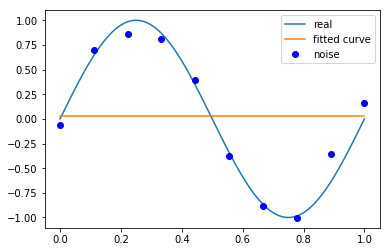

In [31]:
# M=0使用y=a拟合
p_lsq_0 = fitting(M=0)

real:目标函数$y=sin2{\pi}x$  
noise:目标函数$y=sin2{\pi}x$加上一个正太分布的噪音干扰  
fitted：拟合曲线

Fitting Parameters: [-1.12130051  0.58473261]


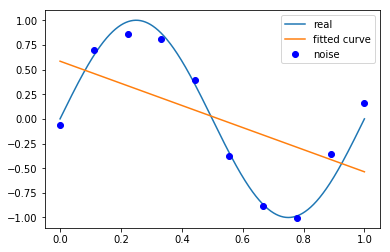

In [32]:
# M=1 使用y=ax+b拟合
p_lsq_1 = fitting(M=1)

Fitting Parameters: [ 21.37011056 -31.57397796  10.56000664  -0.08270017]


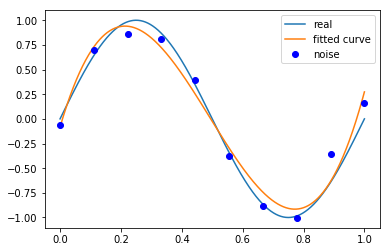

In [33]:
# M=3 使用一元二次方程拟合
p_lsq_3 = fitting(M=3)

Fitting Parameters: [-1.40247143e+04  6.15623498e+04 -1.12939481e+05  1.12131339e+05
 -6.51643986e+04  2.23886447e+04 -4.35717616e+03  4.11233766e+02
 -7.57970112e+00 -6.00761933e-02]


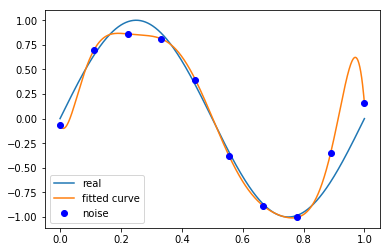

In [34]:
# M=9
p_lsq_9 = fitting(M=9)

当M=9时，多项式曲线通过了每个数据点，但是造成了过拟合

### 正则化
结果显示过拟合， 引入正则化项(regularizer)，降低过拟合

$Q(x)=\sum_{i=1}^n(h(x_i)-y_i)^2+\lambda||w||^2$。

回归问题中，损失函数是平方损失，正则化项可以是参数向量的L2范数,也可以是L1范数。

L1: regularization*abs(p)

L2: 0.5 * regularization * np.square(p)

L0范数指向量中非零元素的个数  
L1范数：向量中每个元素绝对值的和   
L2范数：向量元素绝对值的平方和再开平方   

In [25]:
 np.append([[1, 2, 3], [4, 5, 6]], [[7, 8, 9]])

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [27]:
regularization = 0.0001

def residuals_func_regularization(p, x, y):
    ret = fit_func(p, x) - y
    ret = np.append(ret, np.sqrt(0.5*regularization*np.square(p))) # L2范数作为正则化项
    print(ret)
    return ret

In [28]:
# 最小二乘法,加正则化项
p_init = np.random.rand(9+1)
p_lsq_regularization = leastsq(residuals_func_regularization, p_init, args=(x, y))

[9.41056731e-01 1.97132352e-01 5.61518728e-02 1.51240659e-01
 6.42099367e-01 1.55472711e+00 2.30838366e+00 2.91851077e+00
 3.25092155e+00 4.72631295e+00 6.15003005e-03 5.64127619e-03
 2.61920223e-03 4.55606915e-03 7.93666028e-04 2.27004098e-03
 3.53608294e-03 2.30729499e-03 4.29712105e-04 6.22947312e-03]
[9.41056731e-01 1.97132352e-01 5.61518728e-02 1.51240659e-01
 6.42099367e-01 1.55472711e+00 2.30838366e+00 2.91851077e+00
 3.25092155e+00 4.72631295e+00 6.15003005e-03 5.64127619e-03
 2.61920223e-03 4.55606915e-03 7.93666028e-04 2.27004098e-03
 3.53608294e-03 2.30729499e-03 4.29712105e-04 6.22947312e-03]
[9.41056731e-01 1.97132352e-01 5.61518728e-02 1.51240659e-01
 6.42099367e-01 1.55472711e+00 2.30838366e+00 2.91851077e+00
 3.25092155e+00 4.72631295e+00 6.15003005e-03 5.64127619e-03
 2.61920223e-03 4.55606915e-03 7.93666028e-04 2.27004098e-03
 3.53608294e-03 2.30729499e-03 4.29712105e-04 6.22947312e-03]
[9.41056731e-01 1.97132352e-01 5.61518728e-02 1.51240659e-01
 6.42099367e-01 1.554

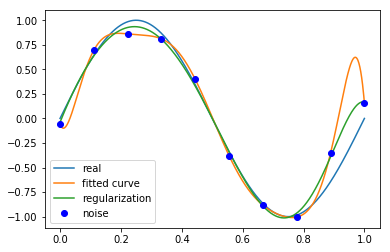

In [29]:
plt.plot(x_points, real_func(x_points), label='real')
plt.plot(x_points, fit_func(p_lsq_9[0], x_points), label='fitted curve')
plt.plot(x_points, fit_func(p_lsq_regularization[0], x_points), label='regularization')
plt.plot(x, y, 'bo', label='noise')
plt.legend()